# Parse the results and display them

In [2]:
import os
import sys
maindir = os.getcwd()
sys.path.append(maindir+"/src")

In [3]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
# read data

# ridge regression
with open("results/ridge_scaled/rmse_ridge.pkl", "rb") as f:
    rmse_ridge = pickle.load(f)

with open("results/ridge_scaled/w_ridge.pkl", "rb") as f:
    w_ridge = pickle.load(f)

with open("results/ridge_scaled/weights_ridge.pkl", "rb") as f:
    weights_ridge = pickle.load(f)

# ridge regression with low-rank constraint
with open("results/ridge_low_rank_scaled/rmse_ridge_lr.pkl", "rb") as f:
    rmse_ridge_lowrank = pickle.load(f)

with open("results/ridge_low_rank_scaled/w_ridge_lr.pkl", "rb") as f:
    w_ridge_lowrank = pickle.load(f)

with open("results/ridge_low_rank_scaled/weights_ridge_lr.pkl", "rb") as f:
    weights_ridge_lowrank = pickle.load(f)


# robust regression
with open("results/robust_scaled/rmse_robust.pkl", "rb") as f:
    rmse_robust = pickle.load(f)

with open("results/robust_scaled/w_robust.pkl", "rb") as f:
    w_robust = pickle.load(f)

with open("results/robust_scaled/weights_robust.pkl", "rb") as f:
    weights_robust = pickle.load(f)


# robust regression with low rank constraint
with open("results/robust_low_rank_scaled/rmse_robust_lr.pkl", "rb") as f:
    rmse_robust_lowrank = pickle.load(f)

with open("results/robust_low_rank_scaled/w_robust_lr.pkl", "rb") as f:
    w_robust_lowrank = pickle.load(f)

with open("results/robust_low_rank_scaled/weights_robust_lr.pkl", "rb") as f:
    weights_robust_lowrank = pickle.load(f)


# regression with trace norm regularization
with open("results/trace_norm_scaled/rmse_trace.pkl", "rb") as f:
    rmse_trace_norm = pickle.load(f)

with open("results/trace_norm_scaled/w_trace.pkl", "rb") as f:
    w_trace_norm = pickle.load(f)

with open("results/trace_norm_scaled/weights_trace.pkl", "rb") as f:
    weights_trace_norm = pickle.load(f)


# robust regression with trace norm regularization
with open("results/robust_trace_norm_scaled/rmse_robust_trace_norm.pkl", "rb") as f:
    rmse_trace_norm_robust = pickle.load(f)

with open("results/robust_trace_norm_scaled/w_robust_trace_norm.pkl", "rb") as f:
    w_trace_norm_robust = pickle.load(f)

with open("results/robust_trace_norm_scaled/weights_robust_trace_norm.pkl", "rb") as f:
    weights_trace_norm_robust = pickle.load(f)

In [5]:
# # define range of values
# mu_range_tmp = np.array([100.0,500.0, 1000.0, 5000.0,10000.0])
# lambda_range_tmp = np.array([0.0,10.0,100.0, 1000.0])

# define range of values
mu_range_tmp = np.array([50.0, 100.0, 500.0, 1000.0])
lambda_range_tmp = np.array([100.0,250.0, 500.0])
nu_range_tmp = np.array([10,100.0,500.0, 1000.0])


# convert to dictionary of tensor 
rmse_ridge_tmp = {lambda_: torch.tensor(list(rmse_ridge[(lambda_,1.0,1.0)].values())) for lambda_ in lambda_range_tmp}
rmse_ridge_lowrank_tmp = {lambda_: torch.tensor(list(rmse_ridge_lowrank[(lambda_,1.0,1.0)].values())) for lambda_ in lambda_range_tmp}
rmse_robust_tmp = {(lambda_,mu_): torch.tensor(list(rmse_robust[(lambda_,mu_,1.0)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_lowrank_tmp = {(lambda_,mu_): torch.tensor(list(rmse_robust_lowrank[(lambda_,mu_,1.0)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_trace_norm_tmp = {(lambda_,nu_): torch.tensor(list(rmse_trace_norm[(lambda_,1.0,nu_)].values())) for lambda_ in lambda_range_tmp for nu_ in nu_range_tmp}
rmse_robust_trace_norm_tmp = {(lambda_,mu_,nu): torch.tensor(list(rmse_trace_norm_robust[(lambda_,mu_,nu)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp for nu in nu_range_tmp}

# get worst and mean error of rmse ridge
rmse_ridge_worst_loo = {lambda_: torch.max(rmse_ridge_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}
rmse_ridge_mean_loo = {lambda_: torch.mean(rmse_ridge_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}

# get worst and mean error of rmse ridge low rank
rmse_ridge_lowrank_worst_loo = {lambda_: torch.max(rmse_ridge_lowrank_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}
rmse_ridge_lowrank_mean_loo = {lambda_: torch.mean(rmse_ridge_lowrank_tmp[lambda_]).item() for lambda_ in lambda_range_tmp}

# get worst and mean error of rmse robust
rmse_robust_worst_loo = {(lambda_,mu_): torch.max(rmse_robust_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_mean_loo = {(lambda_,mu_): torch.mean(rmse_robust_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}

# get worst and mean error of rmse robust low rank
rmse_robust_lowrank_worst_loo = {(lambda_,mu_): torch.max(rmse_robust_lowrank_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_lowrank_mean_loo = {(lambda_,mu_): torch.mean(rmse_robust_lowrank_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}


# get worst and mean error of rmse trace norm
rmse_trace_norm_worst_loo = {(lambda_,nu_): torch.max(rmse_trace_norm_tmp[(lambda_,nu_)]).item() for lambda_ in lambda_range_tmp for nu_ in nu_range_tmp}
rmse_trace_norm_mean_loo = {(lambda_,nu_): torch.mean(rmse_trace_norm_tmp[(lambda_,nu_)]).item() for lambda_ in lambda_range_tmp for nu_ in nu_range_tmp}

# get worst and mean error of rmse robust trace norm
rmse_robust_trace_norm_worst_loo = {(lambda_,mu_,nu): torch.max(rmse_robust_trace_norm_tmp[(lambda_,mu_,nu)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp for nu in nu_range_tmp}
rmse_robust_trace_norm_mean_loo = {(lambda_,mu_,nu): torch.mean(rmse_robust_trace_norm_tmp[(lambda_,mu_,nu)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp for nu in nu_range_tmp}


In [6]:
rmse_robust_trace_norm_worst_loo

{(100.0, 50.0, 10.0): 5.126293182373047,
 (100.0, 50.0, 100.0): 5.045925140380859,
 (100.0, 50.0, 500.0): 4.723755359649658,
 (100.0, 50.0, 1000.0): 4.41349983215332,
 (100.0, 100.0, 10.0): 5.128035545349121,
 (100.0, 100.0, 100.0): 5.050249099731445,
 (100.0, 100.0, 500.0): 4.737051963806152,
 (100.0, 100.0, 1000.0): 4.41038703918457,
 (100.0, 500.0, 10.0): 5.115106105804443,
 (100.0, 500.0, 100.0): 5.048888683319092,
 (100.0, 500.0, 500.0): 4.7602314949035645,
 (100.0, 500.0, 1000.0): 4.427905559539795,
 (100.0, 1000.0, 10.0): 4.939762115478516,
 (100.0, 1000.0, 100.0): 4.893359184265137,
 (100.0, 1000.0, 500.0): 4.66076135635376,
 (100.0, 1000.0, 1000.0): 4.366932392120361,
 (250.0, 50.0, 10.0): 5.045190334320068,
 (250.0, 50.0, 100.0): 4.967004776000977,
 (250.0, 50.0, 500.0): 4.654017448425293,
 (250.0, 50.0, 1000.0): 4.351757049560547,
 (250.0, 100.0, 10.0): 5.047432899475098,
 (250.0, 100.0, 100.0): 4.971623420715332,
 (250.0, 100.0, 500.0): 4.6670379638671875,
 (250.0, 100.0, 1

In [8]:
# get the best (worst and mean) rmse for each method
best_worst_ridge = min(rmse_ridge_worst_loo, key=rmse_ridge_worst_loo.get)
best_worst_ridge_lowrank = min(rmse_ridge_lowrank_worst_loo, key=rmse_ridge_lowrank_worst_loo.get)
best_worst_robust = min(rmse_robust_worst_loo, key=rmse_robust_worst_loo.get)
best_worst_robust_lowrank = min(rmse_robust_lowrank_worst_loo, key=rmse_robust_lowrank_worst_loo.get)
best_worst_trace_norm = min(rmse_trace_norm_worst_loo, key=rmse_trace_norm_worst_loo.get)
best_worst_robust_trace_norm = min(rmse_robust_trace_norm_worst_loo, key=rmse_robust_trace_norm_worst_loo.get)


best_mean_ridge = min(rmse_ridge_mean_loo, key=rmse_ridge_mean_loo.get)
best_mean_ridge_lowrank = min(rmse_ridge_lowrank_mean_loo, key=rmse_ridge_lowrank_mean_loo.get)
best_mean_robust = min(rmse_robust_mean_loo, key=rmse_robust_mean_loo.get)
best_mean_robust_lowrank = min(rmse_robust_lowrank_mean_loo, key=rmse_robust_lowrank_mean_loo.get)
best_mean_trace_norm = min(rmse_trace_norm_mean_loo, key=rmse_trace_norm_mean_loo.get)
best_mean_robust_trace_norm = min(rmse_robust_trace_norm_mean_loo, key=rmse_robust_trace_norm_mean_loo.get)


In [9]:
best_worst_ridge

500.0

In [19]:
# define the best rmse for each method
rmse_best_worst_ridge = rmse_ridge[(best_worst_ridge,1.0,1.0)]
rmse_best_worst_ridge_lowrank = rmse_ridge_lowrank[(best_worst_ridge_lowrank,1.0,1.0)]
rmse_best_worst_robust = rmse_robust[(best_worst_robust[0],best_worst_robust[1],1.0)]
rmse_best_worst_robust_lowrank = rmse_robust_lowrank[(best_worst_robust_lowrank[0],best_worst_robust_lowrank[1],1.0)]
rmse_best_worst_trace_norm = rmse_trace_norm[(500.0,1.0,500.0)]
rmse_best_worst_robust_trace_norm = rmse_trace_norm_robust[(best_worst_robust_trace_norm)]

rmse_best_mean_ridge = rmse_ridge[(best_mean_ridge,1.0,1.0)]
rmse_best_mean_ridge_lowrank = rmse_ridge_lowrank[(best_mean_ridge_lowrank,1.0,1.0)]
rmse_best_mean_robust = rmse_robust[(best_mean_robust[0],best_mean_robust[1],1.0)]
rmse_best_mean_robust_lowrank = rmse_robust_lowrank[(best_mean_robust_lowrank[0],best_mean_robust_lowrank[1],1.0)]
# rmse_best_mean_robust = rmse_robust[(best_mean_robust[0],1.0,best_mean_robust[1])]
# rmse_best_mean_robust_lowrank = rmse_robust_lowrank[(best_mean_robust_lowrank)]
rmse_best_mean_trace_norm = rmse_trace_norm[(best_mean_trace_norm[0],1.0,best_mean_trace_norm[1])]
rmse_best_mean_robust_trace_norm = rmse_trace_norm_robust[(best_mean_robust_trace_norm)]


In [20]:
################### Ridge regresssion ########################
# compute the ridge loo
rmse_ridge_tmp =  np.array(list(rmse_best_worst_ridge.values()))

# worst loo 
# Ridge
worst_loo_ridge = np.max(rmse_ridge_tmp)
mean_loo_ridge = np.mean(rmse_ridge_tmp)


# quantile 95, 90, 75
q_loo_95_ridge = np.quantile(rmse_ridge_tmp, 0.95)
q_loo_90_ridge = np.quantile(rmse_ridge_tmp, 0.90)
q_loo_75_ridge = np.quantile(rmse_ridge_tmp, 0.75)
q_loo_50_ridge = np.quantile(rmse_ridge_tmp, 0.5)


######################## compute the ridge rrr ######################
rmse_rrr_tmp =  np.array(list(rmse_best_worst_ridge_lowrank.values()))

# worst loo Ridge
worst_loo_rrr = np.max(rmse_rrr_tmp)
mean_loo_rrr = np.mean(rmse_rrr_tmp)


# quantile 95, 90, 75
q_loo_95_rrr = np.quantile(rmse_rrr_tmp, 0.95)
q_loo_90_rrr = np.quantile(rmse_rrr_tmp, 0.90)
q_loo_75_rrr = np.quantile(rmse_rrr_tmp, 0.75)
q_loo_50_rrr = np.quantile(rmse_rrr_tmp, 0.5)


# ######################## compute the robust regression ######################
rmse_robust_tmp =  np.array(list(rmse_best_worst_robust.values()))

# worst loo Ridge
worst_loo_robust = np.max(rmse_robust_tmp)
mean_loo_robust = np.mean(rmse_robust_tmp)


# quantile 95, 90, 75
q_loo_95_robust = np.quantile(rmse_robust_tmp, 0.95)
q_loo_90_robust = np.quantile(rmse_robust_tmp, 0.90)
q_loo_75_robust = np.quantile(rmse_robust_tmp, 0.75)
q_loo_50_robust = np.quantile(rmse_robust_tmp, 0.5)

# ######################## compute the robust regression with low rank constraint ######################
rmse_robust_rrr =  np.array(list(rmse_best_worst_robust_lowrank.values()))

# worst loo Ridge
worst_loo_robust_rrr = np.max(rmse_robust_rrr)
mean_loo_robust_rrr = np.mean(rmse_robust_rrr)


# quantile 95, 90, 75
q_loo_95_robust_rrr = np.quantile(rmse_robust_rrr, 0.95)
q_loo_90_robust_rrr = np.quantile(rmse_robust_rrr, 0.90)
q_loo_75_robust_rrr = np.quantile(rmse_robust_rrr, 0.75)
q_loo_50_robust_rrr = np.quantile(rmse_robust_rrr, 0.5)

######################## compute the ridge regression with trace norm regularization ######################
rmse_trace_tmp =  np.array(list(rmse_best_worst_trace_norm.values()))

# worst loo Ridge
worst_loo_trace = np.max(rmse_trace_tmp)
mean_loo_trace = np.mean(rmse_trace_tmp)



# quantile 95, 90, 75
q_loo_95_trace = np.quantile(rmse_trace_tmp, 0.95)
q_loo_90_trace = np.quantile(rmse_trace_tmp, 0.90)
q_loo_75_trace = np.quantile(rmse_trace_tmp, 0.75)
q_loo_50_trace = np.quantile(rmse_trace_tmp, 0.5)

######################## compute the robust regression with trace norm regularization ######################
rmse_trace_robust_tmp =  np.array(list(rmse_best_worst_robust_trace_norm.values()))

# worst loo Ridge
worst_loo_trace_robust = np.max(rmse_trace_robust_tmp)
mean_loo_trace_robust = np.mean(rmse_trace_robust_tmp)


# quantile 95, 90, 75
q_loo_95_trace_robust = np.quantile(rmse_trace_robust_tmp, 0.95)
q_loo_90_trace_robust = np.quantile(rmse_trace_robust_tmp, 0.90)
q_loo_75_trace_robust = np.quantile(rmse_trace_robust_tmp, 0.75)
q_loo_50_trace_robust = np.quantile(rmse_trace_robust_tmp, 0.5)
                                    

print("======= Statistics ========")
print("\n")
print("          Ridge   RR-Lr   Trace  Robust-Trace Robust   Robust-Lr")
print("Worst:    {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(worst_loo_ridge,worst_loo_rrr,worst_loo_trace, worst_loo_trace_robust, worst_loo_robust, worst_loo_robust_rrr))
print("0.95:     {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_95_ridge,q_loo_95_rrr,q_loo_95_trace, q_loo_95_trace_robust, q_loo_95_robust, q_loo_95_robust_rrr))
print("0.90:     {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_90_ridge,q_loo_90_rrr,q_loo_90_trace, q_loo_90_trace_robust, q_loo_90_robust, q_loo_90_robust_rrr))
print("0.75:     {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_75_ridge,q_loo_75_rrr,q_loo_75_trace, q_loo_75_trace_robust, q_loo_75_robust, q_loo_75_robust_rrr))
print("Median:   {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_50_ridge,q_loo_50_rrr,q_loo_50_trace, q_loo_50_trace_robust, q_loo_50_robust, q_loo_50_robust_rrr))
print("Mean:     {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(mean_loo_ridge,mean_loo_rrr,mean_loo_trace, mean_loo_trace_robust, mean_loo_robust, mean_loo_robust_rrr))

======= Statistics ========


          Ridge   RR-Lr   Trace  Robust-Trace Robust   Robust-Lr
Worst:    6.622   6.606   4.975   4.206   5.367   5.474
0.95:     2.968   2.961   2.230   2.811   2.640   2.691
0.90:     2.298   2.285   1.680   2.020   2.050   2.078
0.75:     1.014   1.004   0.760   1.291   1.230   1.243
Median:   0.325   0.311   0.253   0.372   0.431   0.436
Mean:     0.954   0.943   0.717   0.843   0.922   0.931


In [12]:
# get the best (worst and mean) weights for each method and display them as histograms
# Robust regression
weights_robust_best_worst = weights_robust[(best_worst_robust[0],best_worst_robust[1],1.0)]
weights_robust_best_worst_tmp = {key: torch.tensor(list(weights_robust_best_worst[key].values())) for key in weights_robust_best_worst.keys()}
weights_robust_best_worst_to_plot = torch.mean(torch.stack(list(weights_robust_best_worst_tmp.values())), dim=0)

/tmp/ipykernel_23465/2960911264.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(weights_robust_best_worst_tmp.keys()), rotation=-90)


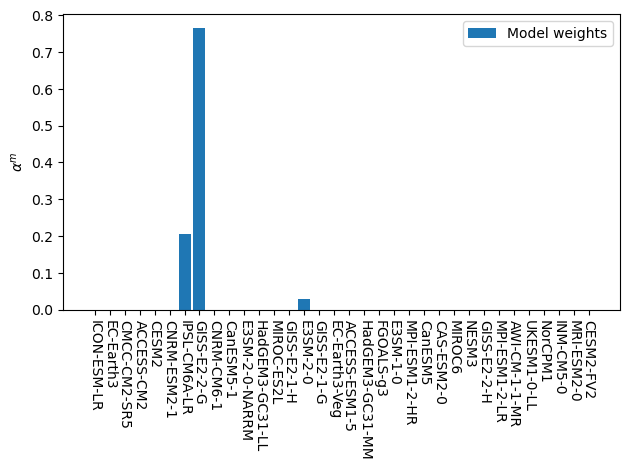

In [13]:
# display histogram of values in weights
# plt.figure()
# plt.hist(weights_robust_best_worst_to_plot, bins=50)
# plt.title("Histogram of weights for robust regression")
# plt.xlabel("Value")
# plt.ylabel("Frequency")

fig, ax = plt.subplots()
ax.bar(list(weights_robust_best_worst_tmp.keys()), weights_robust_best_worst_to_plot.detach().numpy(),label='Model weights')
ax.set_ylabel(r'$\alpha^m$')
ax.legend()
ax.set_xticklabels(list(weights_robust_best_worst_tmp.keys()), rotation=-90)
plt.tight_layout()
# plt.savefig("results/weights_"+str(mu_)+"_"+str(lambda_)+".eps", dpi=150)
plt.show()



# plt.savefig("results/robust/histogram_weights_robust.png")
# plt.close()

## Define the weights 